In [1]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Load the Dataset
df_rating_books_raw = pd.read_csv('../data/processed/filtered_data_processed.csv')

df_rating_books_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339620 entries, 0 to 339619
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      339620 non-null  int64  
 1   index           339620 non-null  int64  
 2   title           339620 non-null  object 
 3   user_id         253152 non-null  object 
 4   helpfulness     339620 non-null  float64
 5   review          339620 non-null  float64
 6   text            339620 non-null  object 
 7   review_year     339620 non-null  int64  
 8   authors         334206 non-null  object 
 9   publisher       282177 non-null  object 
 10  categories      309345 non-null  object 
 11  published_year  339620 non-null  int64  
 12  num_reviews     339620 non-null  int64  
 13  num_row         339620 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 36.3+ MB


In [3]:
df_rating_books_raw = df_rating_books_raw.drop(['Unnamed: 0'], axis=1)

In [4]:
df_rating_books_raw.sample(10)

,index,title,user_id,helpfulness,review,text,review_year,authors,publisher,categories,published_year,num_reviews,num_row
169010,327889,The great Gatsby (Leading English literature l...,NaN,0.200000,2.0,First let me start out by saying that I am a h...,2001,['F. Scott Fitzgerald'],Penguin,['Fiction'],2021,1766,169010
234025,417928,Bridget Jones's Diary,NaN,0.000000,5.0,This is one of the funniest books I have ever ...,1999,['Helen Fielding'],Penguin,['Fiction'],2001,2248,234025
233295,417191,Bridget Jones's Diary,A2FVTBK46IGKJG,0.000000,3.0,"First off, I tend not to like to rate books wi...",2000,['Helen Fielding'],Penguin,['Fiction'],2001,2248,233295
95804,227234,Goodnight Moon,A2VRO5HI7X9YSW,0.600000,5.0,I remembered this book as a child and decided ...,2004,['Margaret Wise Brown'],HarperCollins,['Juvenile Fiction'],2016,959,95804
175522,336826,George Orwell 1984,A1SO72BC2JQ8JI,0.000000,5.0,This book is as powerful as it was when it was...,1999,['George Orwell'],epubli,['Fiction'],2021,1883,175522
174399,335682,George Orwell 1984,NaN,0.000000,5.0,1984 is the most profound book I have read. At...,1998,['George Orwell'],epubli,['Fiction'],2021,1883,174399
257635,445990,Jane Eyre (Large Print),A1XBCQ1I4LC9HZ,0.000000,5.0,"This book is a jewel, a true love story withou...",2013,"['Charlotte Brontë', ' Marc Cactus']",NaN,['Fiction'],2019,1523,257635
132272,271594,Angela's Ashes (Turtleback School & Library Bi...,A1C7D326K5B6TZ,0.000000,5.0,The product came earlier than expected in perf...,2009,['Abraham Verghese'],Random House India,['Fiction'],2012,1603,132272
158205,313285,"The fountainhead,",A3KJ16HH97EAJM,0.285714,3.0,This was my first Rand book. Having read all 7...,2007,['Ayn Rand'],Penguin Modern Classics,['Architects'],2007,1210,158205
132684,272009,Angela's Ashes (Turtleback School & Library Bi...,A2K5E1I03AWVA6,0.000000,4.0,If you like a sad story then &quot;Angela's&qu...,2002,['Abraham Verghese'],Random House India,['Fiction'],2012,1603,132684


In [5]:
df_vader_sentiment_raw = pd.read_csv('../data/processed/df_reduced_with_sentiment.csv')

df_vader_sentiment_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339620 entries, 0 to 339619
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  339620 non-null  int64 
 1   num_row     339620 non-null  int64 
 2   text_clean  339617 non-null  object
 3   sentiment   339620 non-null  object
dtypes: int64(2), object(2)
memory usage: 10.4+ MB


In [6]:
df_vader_sentiment = df_vader_sentiment_raw.drop(['Unnamed: 0'], axis=1)
df_vader_sentiment.sample()

,num_row,text_clean,sentiment
212062,212062,never encountered vast array interesting chara...,POS


In [7]:
df_all_data = df_rating_books_raw.merge(df_vader_sentiment, on='num_row', how='inner')
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339620 entries, 0 to 339619
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           339620 non-null  int64  
 1   title           339620 non-null  object 
 2   user_id         253152 non-null  object 
 3   helpfulness     339620 non-null  float64
 4   review          339620 non-null  float64
 5   text            339620 non-null  object 
 6   review_year     339620 non-null  int64  
 7   authors         334206 non-null  object 
 8   publisher       282177 non-null  object 
 9   categories      309345 non-null  object 
 10  published_year  339620 non-null  int64  
 11  num_reviews     339620 non-null  int64  
 12  num_row         339620 non-null  int64  
 13  text_clean      339617 non-null  object 
 14  sentiment       339620 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 38.9+ MB


In [8]:
df_all_data.sample(10)

,index,title,user_id,helpfulness,review,text,review_year,authors,publisher,categories,published_year,num_reviews,num_row,text_clean,sentiment
296762,489465,"Brave new world,: A novel",A1MH4WA7A1QOE,0.0,5.0,Huxley's dystopia novel of a world controled b...,2005,['Aldous Huxley'],Harper Collins,['Fiction'],1998,1053,296762,huxleys dystopia novel world controled placati...,POS
189879,357360,Alice in Wonderland,A1L2P9B7IMDQ98,0.0,5.0,got this book as a gift for a friend. she tota...,2012,['Lewis Carroll'],NaN,['Adventure and adventurers'],1869,1520,189879,got book gift friend totally loves it illustra...,POS
254890,443191,Wuthering Heights (College classics in English),ATJYUM3F0JCY7,0.0,3.0,Enjoyed re-reading this book. It is a great cl...,2013,['Emily Brontë'],HarperCollins UK,['Fiction'],2010,1062,254890,enjoyed rereading book great classic always go...,POS
26528,54206,"The Hobbitt, or there and back again; illustra...",NaN,0.0,5.0,This is one of the best books ever written! Pr...,2004,['J. R. R. Tolkien'],Houghton Mifflin Harcourt,['Fiction'],2013,4420,26528,one best books ever written prof tolkein one b...,POS
217395,391910,Earth Abides,A3Q3EN6H3XAP7G,0.4,1.0,My hobby is reading . I enjoy reading stories....,2011,['George.R. Stewart'],Hachette UK,['Fiction'],2015,922,217395,hobby reading enjoy reading stories kinds sto...,POS
11101,21023,A Tree Grows in Brooklyn,A3FMTRBCG5554L,0.2,5.0,This is the best book I have ever read. As a y...,2003,['Betty Smith'],Random House,['Fiction'],1992,3904,11101,best book ever read young girl could relate fr...,POS
90636,221987,Great Gatsby (Everyman),NaN,0.0,5.0,Many of the people who gave this book a bad re...,1999,['F. Scott Fitzgerald'],Everyman's Library,['American Dream'],2021,1785,90636,many people gave book bad review must understa...,POS
74261,160553,The Awakening,NaN,0.0,3.0,The narrative style of this novel is quite ast...,1998,['Kate Chopin'],Lulu.com,['Fiction'],2016,1382,74261,narrative style novel quite astonishingly clum...,POS
337540,530755,The Hobbit or There and Back Again,A1HSBI580VZHYX,0.0,5.0,The book keeps you engaged from beginning to e...,2013,['J. R. R. Tolkien'],Mariner Books,['Juvenile Fiction'],2012,4373,337540,book keeps engaged beginning end great charact...,POS
237987,423846,Suzannes Diary For Nicholas,A13GQ1GYJ85M7D,1.0,1.0,"I have read just about every Patterson book, s...",2001,['James Patterson'],NaN,NaN,1981,879,237987,read every patterson book imagine disappointed...,POS


In [9]:
#Original Text is removed as clean text is added
df_all_data = df_all_data.drop(['text'], axis=1)
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339620 entries, 0 to 339619
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           339620 non-null  int64  
 1   title           339620 non-null  object 
 2   user_id         253152 non-null  object 
 3   helpfulness     339620 non-null  float64
 4   review          339620 non-null  float64
 5   review_year     339620 non-null  int64  
 6   authors         334206 non-null  object 
 7   publisher       282177 non-null  object 
 8   categories      309345 non-null  object 
 9   published_year  339620 non-null  int64  
 10  num_reviews     339620 non-null  int64  
 11  num_row         339620 non-null  int64  
 12  text_clean      339617 non-null  object 
 13  sentiment       339620 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 36.3+ MB


In [10]:
df_all_data = df_all_data.drop(['index'], axis=1)
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339620 entries, 0 to 339619
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           339620 non-null  object 
 1   user_id         253152 non-null  object 
 2   helpfulness     339620 non-null  float64
 3   review          339620 non-null  float64
 4   review_year     339620 non-null  int64  
 5   authors         334206 non-null  object 
 6   publisher       282177 non-null  object 
 7   categories      309345 non-null  object 
 8   published_year  339620 non-null  int64  
 9   num_reviews     339620 non-null  int64  
 10  num_row         339620 non-null  int64  
 11  text_clean      339617 non-null  object 
 12  sentiment       339620 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 33.7+ MB


In [11]:
df_all_data = df_all_data.drop(['num_row'], axis=1)
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339620 entries, 0 to 339619
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           339620 non-null  object 
 1   user_id         253152 non-null  object 
 2   helpfulness     339620 non-null  float64
 3   review          339620 non-null  float64
 4   review_year     339620 non-null  int64  
 5   authors         334206 non-null  object 
 6   publisher       282177 non-null  object 
 7   categories      309345 non-null  object 
 8   published_year  339620 non-null  int64  
 9   num_reviews     339620 non-null  int64  
 10  text_clean      339617 non-null  object 
 11  sentiment       339620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 31.1+ MB


In [12]:
df_all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
helpfulness,339620.0,0.358999,0.413564,0.0,0.0,0.0,0.777778,3.0
review,339620.0,4.229465,1.230994,1.0,4.0,5.0,5.000000,5.0
review_year,339620.0,2004.944494,5.025348,1995.0,2000.0,2004.0,2010.000000,2013.0
published_year,339620.0,2000.147427,27.785597,1734.0,1998.0,2008.0,2014.000000,2021.0
num_reviews,339620.0,2557.833758,3015.511355,852.0,1114.0,1753.0,2797.000000,22023.0


In [13]:
df_all_data['review'].value_counts()

review
5.0    212805
4.0     59142
3.0     25693
1.0     25221
2.0     16759
Name: count, dtype: int64

In [14]:
pd.set_option('display.max_colwidth', 150)

In [15]:
df_all_data[df_all_data['review']==5]['text_clean'].sample(5, random_state=1299)

75381                                                                                              received book one day book excellent condition  star service
262913                                               book one best books ive read long time assigned book english independent read glad iti sucked start finish
98131                                     paperback th anniversary one volume edition worth price quality better expected happy purchase seller prompt reliable
269626                                                 book long time favorite great info relate others respectfully helps us personally turn respect ourselves
62978     come across book touches soul lingers throughout entire life &quot;little women&quot; timeless classic enjoyed again muchweathered copy true treas...
Name: text_clean, dtype: object

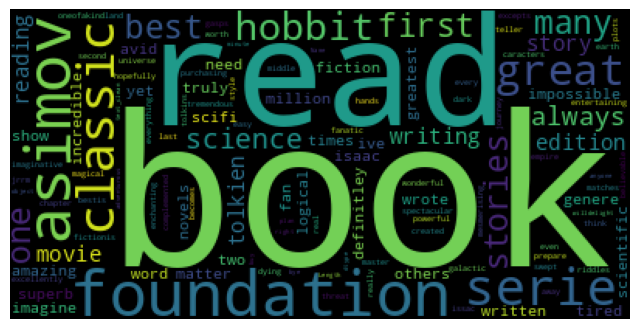

In [16]:
wordcloud5 = WordCloud(max_words=1000).generate(str(df_all_data[df_all_data['review']==5]['text_clean']))

fig = plt.figure(figsize=(8,8))

plt.axis('off')

plt.imshow(wordcloud5)

plt.show()

In [17]:
df_all_data[df_all_data['review']==1]['text_clean'].sample(5, random_state=1299)

87143     book greatest characterssuspense detailthe reasons book things author explians characters feelings physical features suspense narrorator tells emo...
257077    received vintage classics edition jane eyre chosen striking red cover discover  pages missing  nothing frustrating caught wonderful book come scre...
201314    recommend book like read things make sense certainly book point whatsoever fact man would kill supposed friend people absolutely horrible absolute...
234902     skimmed back cover read brief summery figured might pass logical wellwritten book end times surely interesting thought paid counterafter got plan...
61377     agree  star reviews here make fun rewarding reading unlike overhyped waste paper  pages cannot read another word years many people telling read th...
Name: text_clean, dtype: object

In [18]:
df_all_data[df_all_data['review']==3]['text_clean'].sample(5, random_state=1299)

9738      really enjoyed book liked elie weisel descriptive true story holocaust book gave realistic image jews went struggle survival book changed perspect...
51201     enormous amount buzz book author used work vouge pr implies roman clef days far reviews ive seen least two major fashion magazines kind chalked fa...
6161      michael crichton novels heart novel crichtons fascinating scientific speculationin novel implications nanotechnology nanotechnology science manufa...
302545    anyone read series first book current pod appreciate subtlety jordan writes although book filled incredibly exciting events characterized earlier ...
178980    well say first finsihed reading book quite sure thought actually im still sure think story started living expectations lost interest somewhere whi...
Name: text_clean, dtype: object

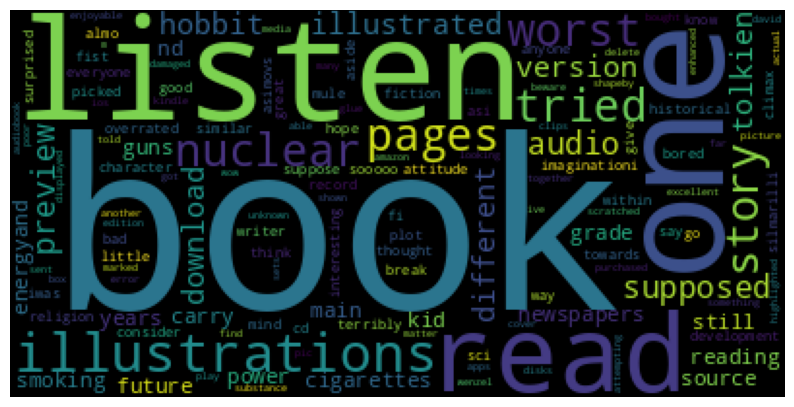

In [19]:
wordcloud1 = WordCloud(max_words=1000).generate(str(df_all_data[df_all_data['review']==1]['text_clean']))

fig = plt.figure(figsize=(10,8))

plt.axis('off')

plt.imshow(wordcloud1)

plt.show()

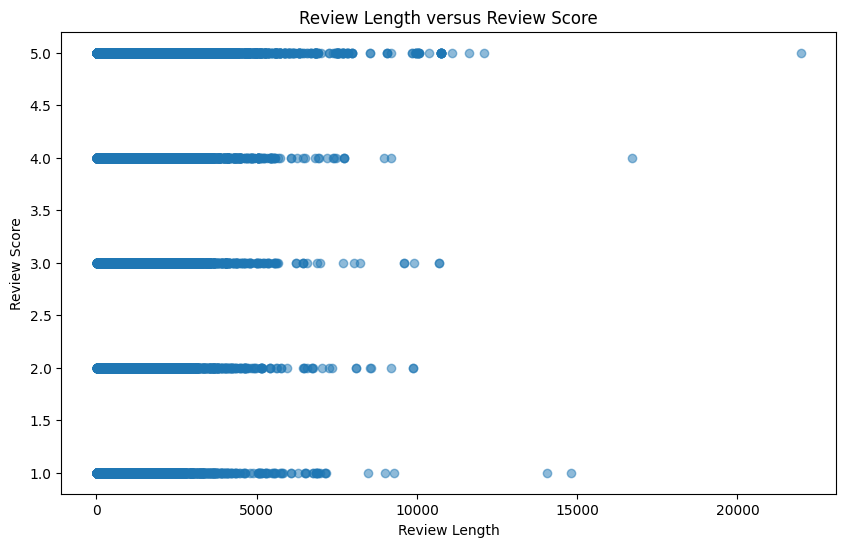

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df_all_data['text_clean'].str.len(), df_all_data['review'], alpha=0.5)
plt.title('Review Length versus Review Score')
plt.xlabel('Review Length')
plt.ylabel('Review Score')
plt.show()

In [21]:
df_all_data['text_clean'].str.len().mean()

511.7346245918196

In [23]:
df_all_data['text_clean'].str.len().std()

596.0321448071281

In [24]:
long_reviews = df_all_data[df_all_data['text_clean'].str.len() > 2000].copy()

len(long_reviews)

10237

In [25]:
long_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
helpfulness,10237.0,0.619556,0.369648,0.0,0.333333,0.75,1.0,1.0
review,10237.0,4.158249,1.189361,1.0,4.000000,5.00,5.0,5.0
review_year,10237.0,2005.990232,3.844311,1996.0,2003.000000,2006.00,2009.0,2013.0
published_year,10237.0,2000.249487,27.240292,1734.0,1998.000000,2007.00,2014.0,2021.0
num_reviews,10237.0,2222.019049,2437.262286,852.0,1053.000000,1524.00,2470.0,22023.0


In [27]:
long_reviews['text_clean'].str.len().mean()

2869.306144378236

In [28]:
short_reviews = df_all_data[df_all_data['text_clean'].str.len() < 200].copy()

len(short_reviews)

110197

In [29]:
short_reviews['text_clean'].str.len().mean()

117.02919317222792

In [30]:
short_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
helpfulness,110197.0,0.209073,0.358634,0.0,0.0,0.0,0.333333,1.0
review,110197.0,4.388767,1.148869,1.0,4.0,5.0,5.000000,5.0
review_year,110197.0,2006.818008,5.663103,1995.0,2001.0,2009.0,2012.000000,2013.0
published_year,110197.0,1999.468053,30.193101,1734.0,1998.0,2009.0,2014.000000,2021.0
num_reviews,110197.0,2859.631024,3671.197392,852.0,1130.0,1785.0,2975.000000,22023.0


In [31]:
high_reviews = df_all_data[df_all_data['review'] == 5].copy()

high_reviews['text_clean'].str.len().mean()

474.14971193879757

In [32]:
neutral_reviews = df_all_data[df_all_data['review'] == 3].copy() # Neutral ratings tend to be larger in words count

neutral_reviews['text_clean'].str.len().mean()

606.1340832133266

In [33]:
low_reviews = df_all_data[df_all_data['review'] == 1].copy()

low_reviews['text_clean'].str.len().mean()

499.3591848063122

<Figure size 1000x600 with 0 Axes>

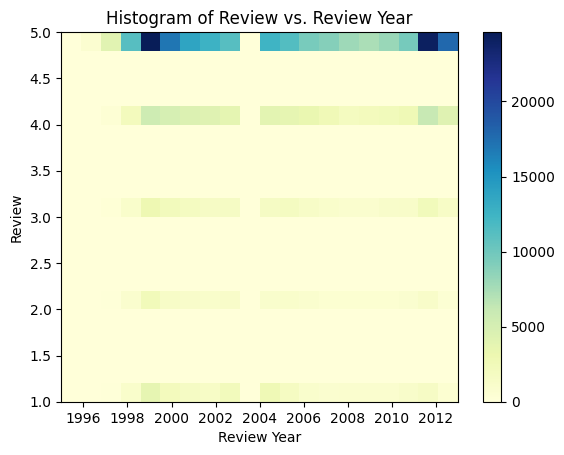

In [34]:
# Create a figure and a set background color
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('white')
plt.figure()
plt.hist2d(df_all_data['review_year'], df_all_data['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

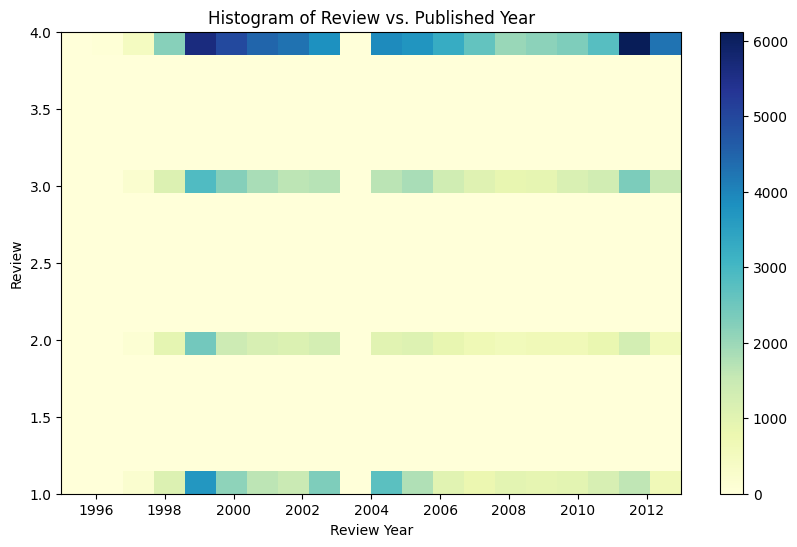

In [35]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data[df_all_data['review'] != 5]['review_year'], df_all_data[df_all_data['review'] != 5]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

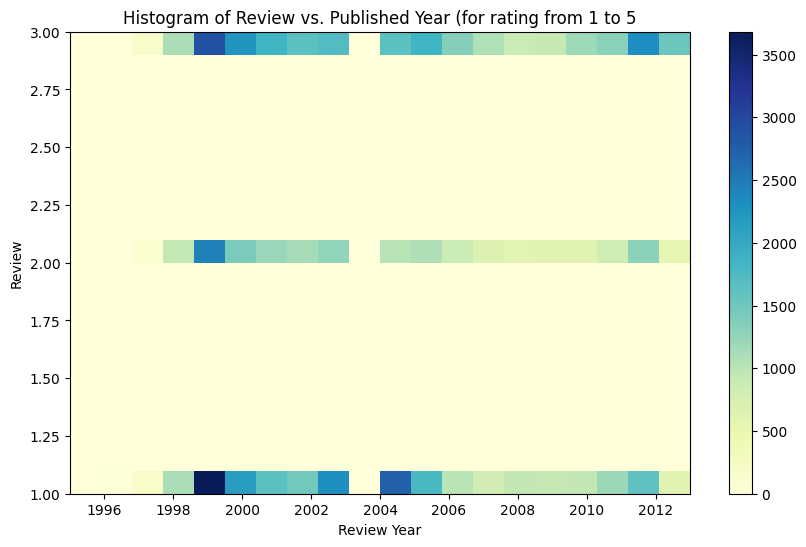

In [36]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data[(df_all_data['review'] != 4) & (df_all_data['review'] != 5)]['review_year'], df_all_data[(df_all_data['review'] != 4) & (df_all_data['review'] != 5)]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year (for rating from 1 to 5')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

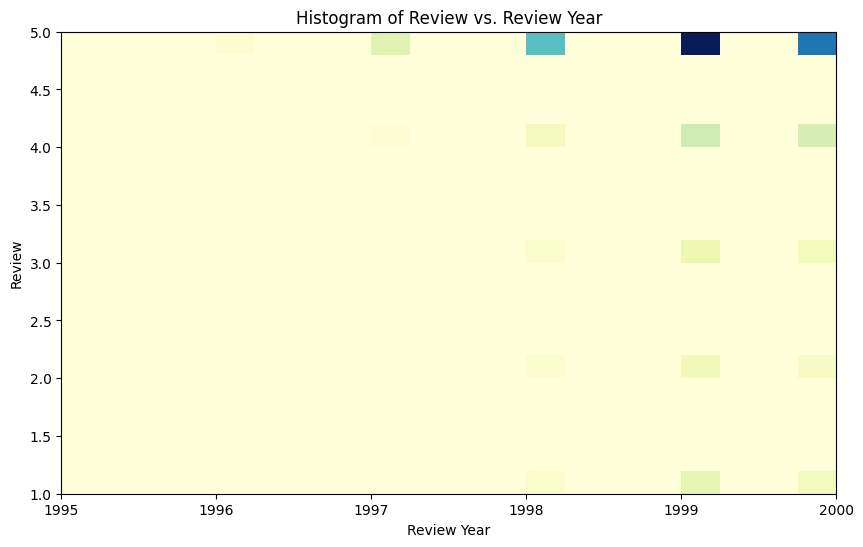

In [37]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data[df_all_data['review_year'] <= 2000]['review_year'], df_all_data[df_all_data['review_year'] <= 2000]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()